Faces detected: 2
Saved detected_faces/face_1.jpg
Saved detected_faces/face_2.jpg


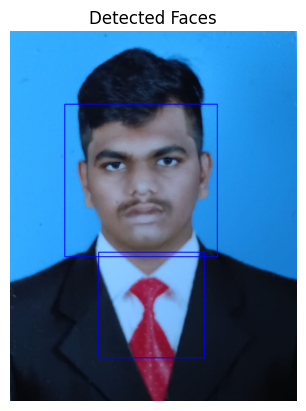

In [1]:
import cv2
import os
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
image = cv2.imread('Passport.jpg')
if image is None:
    print("Error: Image not found.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    print(f"Faces detected: {len(faces)}")
    os.makedirs("detected_faces", exist_ok=True)
    for i, (x, y, w, h) in enumerate(faces):
        face = image[y:y+h, x:x+w]  # crop the face
        filename = f"detected_faces/face_{i+1}.jpg"
        cv2.imwrite(filename, face)
        print(f"Saved {filename}")
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    from matplotlib import pyplot as plt
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Detected Faces")
    plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
def detect_face(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return frame
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
plt.ion()
fig, ax = plt.subplots()
ret, frame = cap.read()
if not ret:
    print("Error: Could not read from camera.")
    cap.release()
else:
    frame = detect_face(frame)
    im = ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Video Face Detection')
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame.")
            break

        frame = detect_face(frame)
        im.set_data(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.draw()
        plt.pause(0.05)  

cap.release()
plt.close()

